#Classificação Multiclasse

### Bibliotecas

Lista de Bibliotecas utilizadas:
 

*   **Pandas** - Permite trabalhar com Dataframe, utilizada para carregar os dados;
*   **Numpy** - Permite trabalhar com algumas operações matemática e com arrays;
*   **Matplotlib** - Permite gerar gráficos;
*   **Sklearn (Scikit-learn)** - Biblioteca que permite trabalhar com alguns algoritmos de aprendizado de máquina além de métricas, tais como acurácia e matriz de confusão;
*   **Keras** - Biblioteca específica para trabalhar com Deep Learning em python, utiliza por trás o Tensorflow;

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #Permite dividir a base de dados em Treino e Teste
from sklearn.metrics import accuracy_score, confusion_matrix #Funções para calcular a acurácia e matriz de confusão do modelo
from sklearn.manifold import TSNE #Permite converter a base de dados de dimensão n para dimensão 2
from sklearn.preprocessing import MinMaxScaler #Permite normalizar os dados para a faixa de 0 à 1
from keras.models import Sequential #Classe que permite criar o objeto que vai representar a Rede Neural
from keras.layers import Dense #Classe que permite criar as camadas da rede neural
from keras.optimizers import SGD #Classe que permite trabalhar com o Otmizador alterando seus hiperparâmetros
from keras.utils import to_categorical #Função que permite transformar as saídas de 0, 1, 2 para [0,0,0], [0,1,0], [0,0,1]

scaler = MinMaxScaler()
tsne = TSNE(n_components=2)

### Carregamento dos Dados

Os dados são carregados na variável **dados**, depois são divididos em **X** e **y**, e por fim são dividos em Treino e Teste, nas variáveis **X_train**, tendo **y_train** como saídas, e **X_test**, tendo **y_test** como saídas.

In [36]:
dados = pd.read_csv('drive/My Drive/basesinhas/sementes.csv')
X = scaler.fit_transform(dados.drop(['y'], axis=1).values)
y = dados['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

###Criação do Modelo

Cria-se a variável **rna**, que representa nosso modelo de rede neural, depois é criado o objeto **camada1**, que representa a primeira camada oculta, com um total de 10 neurônios, definidos no parâmetro **units**, e função de ativação Relu definida no parâmetro **activation**. Como **camada1** é a primeira camada oculta, define-se nela a quantidade de nós na camada de entrada, no parâmetro **input_shape**, definida na variável **n_entradas**, que é a dimensão da base de dados. Depois a **camadaSaida**, que representa a camada de saída da rede neural, com um total de 3 neurônio e função de ativação Softmax.
Definiu-se o Gradiente Descendente como Otmizados, utilizando a biblioteca SGD, com taxa de aprendizado de 0.1 (**learning_rate**) e **momentum** de 0.9. Definiu-se um total de 80 épocas (**epochs**).

In [37]:
rna = Sequential()

n_entradas = np.size(X, axis=1)

camada1 = Dense(units=10, activation='relu', input_shape=(n_entradas,))
camadaSaida = Dense(units=3, activation='softmax')

rna.add(camada1)
rna.add(camadaSaida)

rna.compile(optimizer=SGD(learning_rate=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
rna.summary()

y_train_prob = to_categorical(y_train)
y_test_prob = to_categorical(y_test)

relatorio = rna.fit(X_train, y_train_prob, epochs=80, validation_data=(X_test, y_test_prob))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 33        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
4/4 [==============================] - 0s 30ms/step - loss: 1.1049 - accuracy: 0.3871 - val_loss: 1.0074 - val_accuracy: 0.5370
Epoch 2/80
4/4 [==============================] - 0s 6ms/step - loss: 0.9400 - accuracy: 0.6694 - val_loss: 0.9062 - val_accuracy: 0.6296
Epoch 3/80
4/4 [==============================] - 0s 5ms/step - loss: 0.7792 - accuracy: 0.7661 - val_loss: 0.7099 - val_accuracy: 0.8333
Epoch 4/80
4/4 [==============================] - 0s 7ms/step - loss: 0.6109 - accuracy: 0.8952 - val_l

###Avaliação da Rede


Visualização da evolução do Erro da rede neural durante o treinamento. Sendo a linha azul o erro com a base de treino e a linha laranja o erro com a base de teste. Permitindo verificar que não está ocorrendo overfitting, pois tanto treino quanto teste evoluem de forma bem similar.

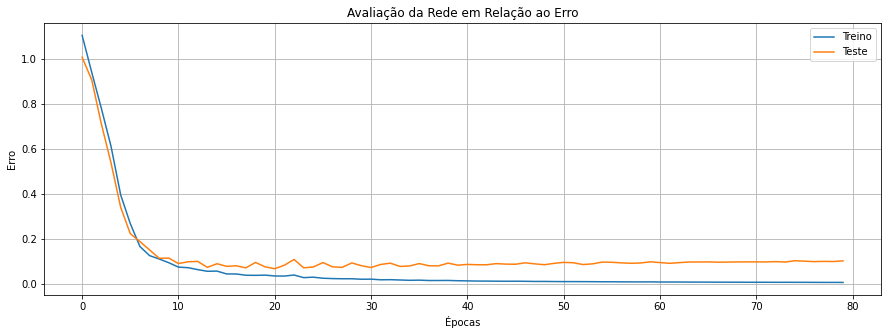

In [46]:
plt.title('Avaliação da Rede em Relação ao Erro')
plt.plot(relatorio.epoch,relatorio.history['loss'], label='Treino')
plt.plot(relatorio.epoch,relatorio.history['val_loss'], label='Teste')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.grid()
plt.show()

Visualização da evolução da Acurácia da rede neural em relação às Épocas. De forma similar ao erro, a acurácia foi equilibrada no treino e teste, podendo assim descartar a possibilidade de overfitting.

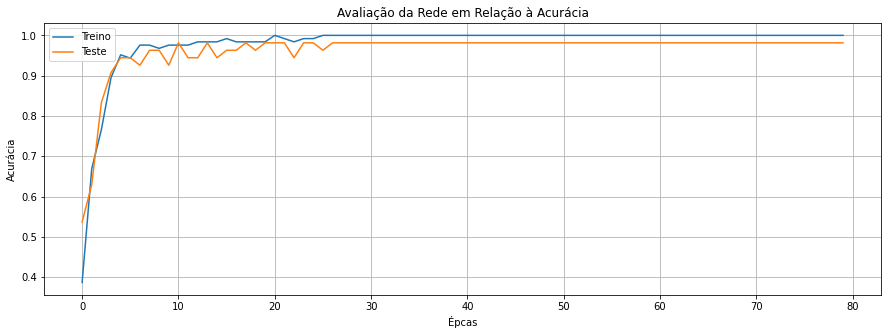

In [45]:
plt.title('Avaliação da Rede em Relação à Acurácia')
plt.plot(relatorio.epoch, relatorio.history['accuracy'], label='Treino')
plt.plot(relatorio.epoch, relatorio.history['val_accuracy'], label='Teste')
plt.xlabel('Épcas')
plt.ylabel('Acurácia')
plt.grid()
plt.legend()
plt.show()

Cálculo da acurácia, representada pela função **accuracy_score**, que recebe **y_test**, que são nossas saídas desejadas, e **y_pred**, que são as saídas preditas pela rede neural, utilizando a função **predict_classes**. Além disso, calcula-se a matriz de confusão pela função **confusion_matrix**.

In [40]:
y_pred = rna.predict_classes(X_test)
acuracia = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)
print(acuracia)
print(matriz)

0.9814814814814815
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


Visualização da Base de Dados, na primeira imagem a visualização dos dados de treinamento, e na segunda os dados de teste classificados pela rede neural. Vale ressaltar, que a base de dados foi reduzida para 2 dimensões, usando o **TSNE**, para nos permiter visualizar em 2-D. 

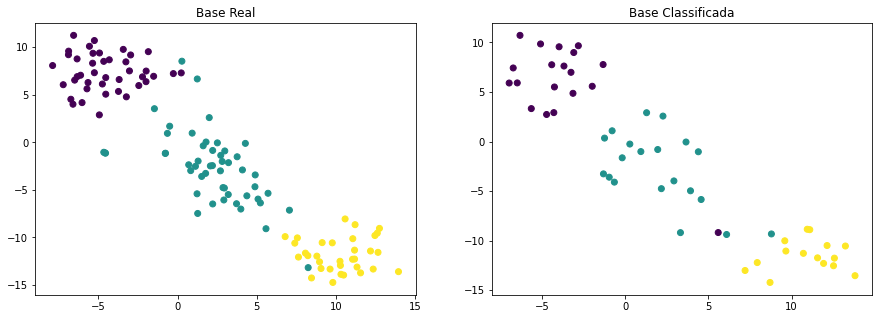

In [41]:
X_tsne = tsne.fit_transform(np.concatenate([X_train, X_test]))
X_train_tsne = X_tsne[0:np.size(X_train, axis=0),:]
X_test_tsne = X_tsne[np.size(X_train, axis=0):np.size(X, axis=0), :]

plt.rcParams['figure.figsize'] = (15,5)
fig, ax = plt.subplots(1, 2)
ax[0].set_title('Base Real')
ax[1].set_title('Base Classificada')
ax[0].scatter(X_train_tsne[:, 0], X_train_tsne[:,1], c=y_train)
ax[1].scatter(X_test_tsne[:, 0], X_test_tsne[:,1], c=y_pred)